In [399]:
import pandas as pd 
import numpy as np 

In [400]:
df = pd.read_csv('healthcare_dataset.csv')

In [401]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [402]:
import statistics 
print(statistics.mode(df['Blood Type']))

A-


In [403]:
print(df['Hospital'].nunique())

39876


In [404]:
df.shape

(55500, 15)

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [406]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])


In [407]:
df.to_excel('healthcare_dataset.xlsx', index = False)

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [409]:
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,55500.000000,55500,55500.000000,55500.000000,55500
mean,51.539459,2021-11-01 01:02:22.443243008,25539.316097,301.134829,2021-11-16 13:15:20.821621504
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13241.224652,202.000000,2020-08-12 00:00:00
50%,52.000000,2021-11-01 00:00:00,25538.069376,302.000000,2021-11-17 00:00:00
75%,68.000000,2023-02-03 00:00:00,37820.508436,401.000000,2023-02-18 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00
std,19.602454,NaN,14211.454431,115.243069,NaN


In [410]:
# df.isna().sum()

In [411]:
duplicates = df.duplicated().sum()
duplicates

534

In [412]:
df_no_duplicates = df.drop_duplicates()

In [413]:
import matplotlib.pyplot as plt

In [414]:
Results = df['Test Results'].value_counts()

<Axes: xlabel='Test Results'>

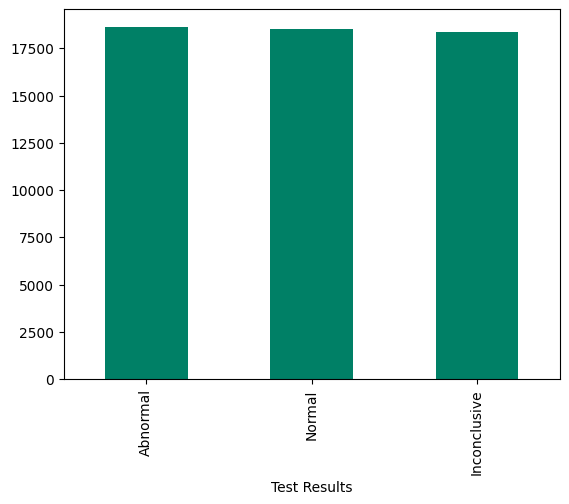

In [415]:
 Results.plot(kind = 'bar', colormap='summer' )

In [416]:
df['Age'] = pd.to_numeric(df['Age'])
df['Age'].value_counts()

Age
38    897
37    893
57    887
80    864
34    864
     ... 
88     25
16     24
14     18
13     14
89      8
Name: count, Length: 77, dtype: int64

In [417]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

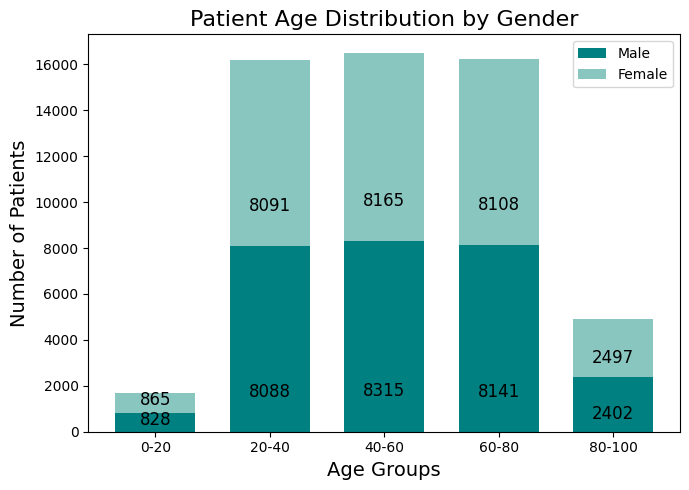

In [418]:
# Define age bins and labels
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

# Cut the data into bins
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count the number of patients in each age group divided by gender
age_gender_counts = df.groupby(['Age Group', 'Gender']).size().unstack(fill_value=0)

# Plotting
age_groups = age_gender_counts.index
male_counts = age_gender_counts['Male']
female_counts = age_gender_counts['Female']

plt.figure(figsize=(7, 5))
bar_width = 0.7

# Stacked bar chart
bars1 = plt.bar(age_groups, male_counts, bar_width, label='Male', color='#008080')
bars2 = plt.bar(age_groups, female_counts, bar_width, bottom=male_counts, label='Female', color='#8ac6c0')

# Adding value labels on the bars
for i, (male, female) in enumerate(zip(male_counts, female_counts)):
    plt.text(i, male / 6, str(male), ha='center', va='bottom', color= 'black', fontsize=12)
    plt.text(i, male + female / 6, str(female), ha='center', va='bottom', color='black', fontsize=12)

plt.title('Patient Age Distribution by Gender', fontsize=16)
plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.legend()
plt.tight_layout()

plt.show()

In [435]:
# Define age bins and labels
bins = [1, 12, 18, 46, 65, 100 ]
labels = ['1-11', '12-17', '18-44', '46-65', '65+']
df2 =df.loc[df['Medical Condition'] == 'Cancer']
# Cut the data into bins
df2['Age Group'] = pd.cut(df2['Age'], bins=bins, labels=labels, right=False)

# Count the number of patients in each age group divided by gender
age_mc_counts = df2.groupby(['Age Group','Medical Condition']).size().unstack(fill_value=0)

age_mc_counts

/var/folders/0c/w7sd8d3x7178p1dkswmtm78c0000gn/T/ipykernel_57972/3778946817.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age Group'] = pd.cut(df2['Age'], bins=bins, labels=labels, right=False)


Medical Condition,Cancer
Age Group,
1-11,0
12-17,21
18-44,3758
46-65,2610
65+,2838


In [430]:
df['Medical Condition'].unique()


array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

<Axes: xlabel='Age Group'>

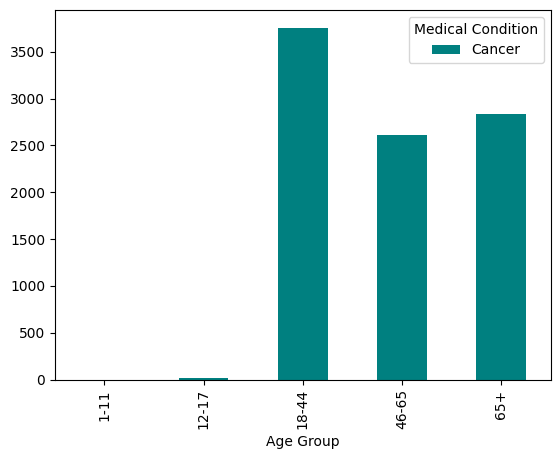

In [440]:
age_mc_counts.plot(kind = 'bar', color='#008080')

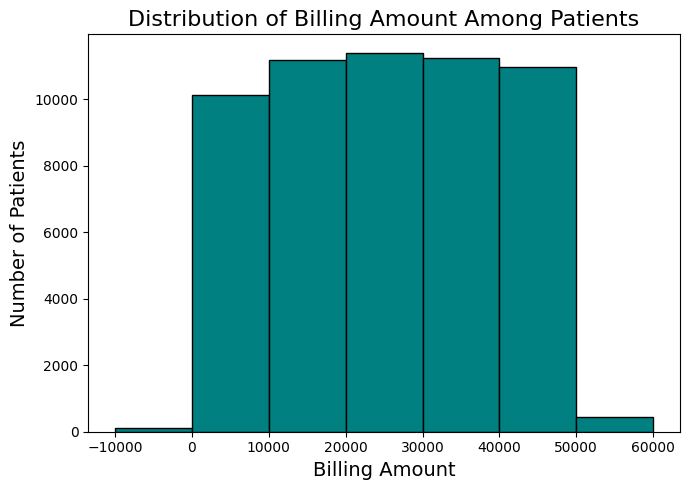

In [359]:
# Determine the minimum and maximum billing amount
min_billing = df['Billing Amount'].min()
max_billing = df['Billing Amount'].max()

# Define the bin width
bin_width = 10000

# Calculate the bin edges
bins = np.arange(np.floor(min_billing / bin_width) * bin_width, np.ceil(max_billing / bin_width) * bin_width + bin_width, bin_width)

# Plotting
plt.figure(figsize=(7, 5))
bar_width = 0.7
plt.hist(df['Billing Amount'], bins=bins, color='#008080', edgecolor='black')

plt.title('Distribution of Billing Amount Among Patients', fontsize=16)
plt.xlabel('Billing Amount', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(bins)
plt.tight_layout()

plt.show()

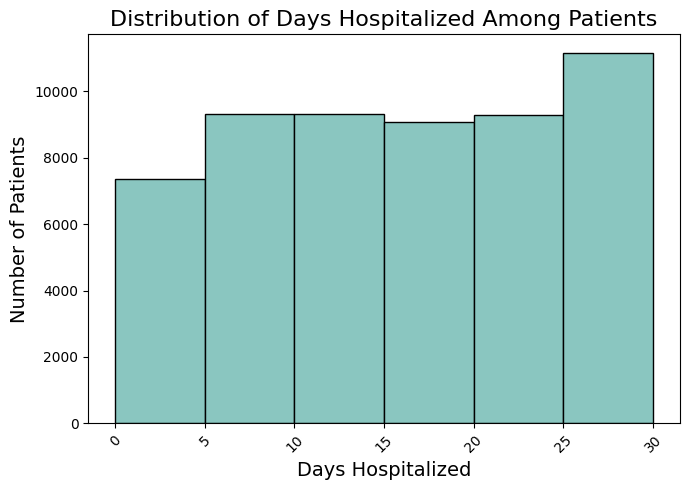

In [360]:
# Calculate the number of days hospitalized for each patient
df['Days Hospitalized'] = (pd.to_datetime(df['Discharge Date']) - pd.to_datetime(df['Date of Admission'])).dt.days


# Determine the minimum and maximum days hospitalized
min_days = df['Days Hospitalized'].min()
max_days = df['Days Hospitalized'].max()

# Define the bin width (for example, 5 days)
bin_width = 5

# Calculate the bin edges
bins = np.arange(np.floor(min_days / bin_width) * bin_width, np.ceil(max_days / bin_width) * bin_width + bin_width, bin_width)

# Plotting the histogram
plt.figure(figsize=(7, 5))
plt.hist(df['Days Hospitalized'], bins=bins, color='#8ac6c0', edgecolor='black')

plt.title('Distribution of Days Hospitalized Among Patients', fontsize=16)
plt.xlabel('Days Hospitalized', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(bins, rotation=45)
plt.tight_layout()

plt.show()

In [384]:

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

df['month'] = df['Date of Admission'].dt.month

monthly = df['month'].value_counts().sort_index()
monthly

month
1     4692
2     4255
3     4672
4     4518
5     4599
6     4699
7     4812
8     4832
9     4546
10    4678
11    4548
12    4649
Name: count, dtype: int64

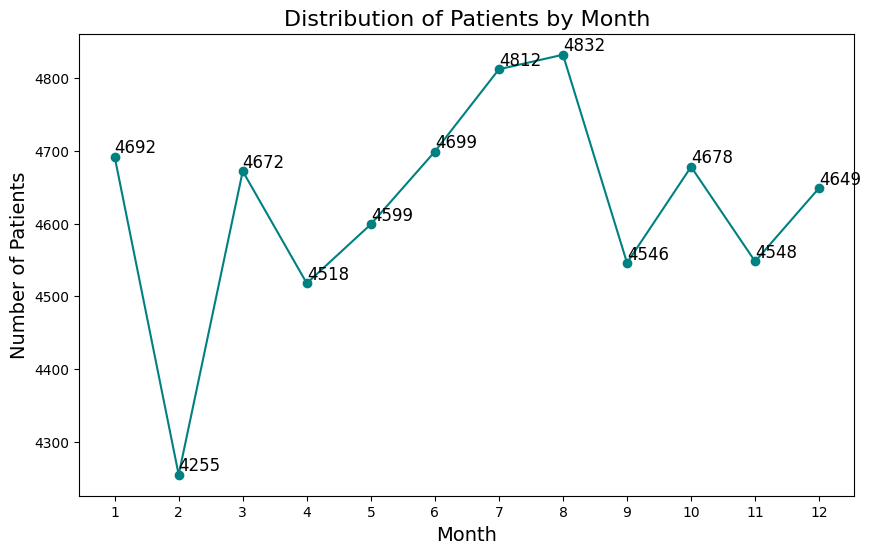

In [386]:

plt.figure(figsize=(10, 6))
plt.plot(monthly.index, monthly.values, marker='o', color='#008080')

for i, value in enumerate(monthly.values):
    plt.text(monthly.index[i], value, str(value), fontsize=12, ha='left', va='bottom')


plt.title('Distribution of Patients by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(range(1, 13))
plt.show()


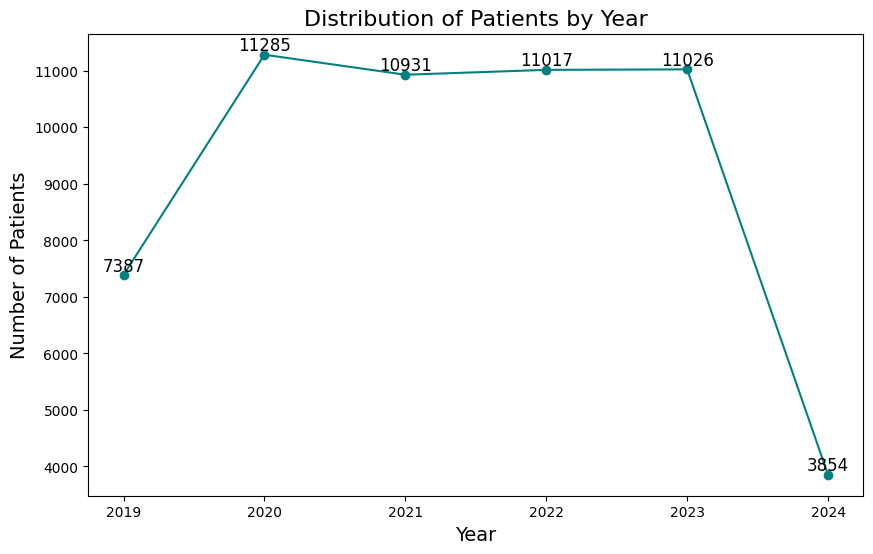

In [390]:
# Chuyển đổi cột 'Date of Admission' thành kiểu dữ liệu datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

# Tạo cột năm từ 'Date of Admission'
df['Year'] = df['Date of Admission'].dt.year

# Đếm số lượng bệnh nhân mỗi năm
yearly = df['Year'].value_counts().sort_index()

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(yearly.index, yearly.values, marker='o', color='#008080')

for i, value in enumerate(yearly.values):
    plt.text(yearly.index[i], value, str(value), fontsize=12, ha='center', va='bottom')
plt.title('Distribution of Patients by Year', fontsize =16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Patients', fontsize =14)
plt.show()

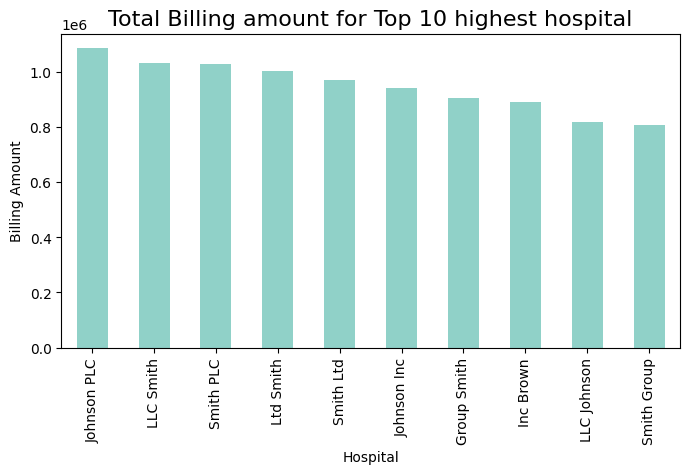

In [362]:
hospital_billing = df.groupby('Hospital')['Billing Amount'].sum()
hospital_billing
hospital_billing_top10 = hospital_billing.nlargest(10)
plt.figure(figsize = (7,5))
hospital_billing_top10.plot(kind = "bar", color = "#90d1c8") 
plt.title("Total Billing amount for Top 10 highest hospital", fontsize = 16)
plt.xlabel('Hospital')
plt.ylabel("Billing Amount")
plt.tight_layout()
plt.show()



In [363]:
hospital_billing

Hospital
Abbott Inc                       38052.041917
Abbott Ltd                       29877.586483
Abbott Moore and Williams,       24799.596339
Abbott and Thompson, Sullivan    16738.569765
Abbott, Peters and Hoffman       37684.793727
                                     ...     
and Zimmerman Sons               32706.652625
and Zuniga Davis Carlson,        42867.041298
and Zuniga Francis Peterson,     33689.630726
and Zuniga Sons                  33950.170483
and Zuniga Thompson, Blake       22067.428763
Name: Billing Amount, Length: 39876, dtype: float64

In [364]:
from sklearn import preprocessing 

In [365]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Gender']= label_encoder.fit_transform(df['Gender']) 
  
df['Gender'].unique() 

array([1, 0])

In [366]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Age Group', 'Days Hospitalized', 'Year'],
      dtype='object')

In [367]:
df['Blood Type'] = label_encoder.fit_transform(df['Blood Type'])
df['Blood Type'].unique()

array([5, 0, 1, 6, 2, 3, 4, 7])

In [368]:
df['Medical Condition'] = label_encoder.fit_transform(df['Medical Condition'])

In [369]:
df['Medication'] = label_encoder.fit_transform(df['Medication'])

In [370]:
# tự encode theo alphabet :
# 0:Abnormal  
# 1:Includesive 
# 2:Normal
df['Test Results'] = label_encoder.fit_transform(df['Test Results'])
df['Test Results'].head(5)


0    2
1    1
2    2
3    0
4    0
Name: Test Results, dtype: int64

In [371]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Age Group,Days Hospitalized,Year
0,Bobby JacksOn,30,1,5,2,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,3,2,20-40,2,2024
1,LesLie TErRy,62,1,0,5,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,1,1,60-80,6,2019
2,DaNnY sMitH,76,0,1,5,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,0,2,60-80,15,2022
3,andrEw waTtS,28,0,6,3,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,1,0,20-40,30,2020
4,adrIENNE bEll,43,0,2,2,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,4,0,40-60,20,2022


In [372]:
df1 = df.drop(['Name','Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication','Year', 'Age Group'], axis = 1)
df1

,Age,Gender,Blood Type,Medical Condition,Test Results,Days Hospitalized
0,30,1,5,2,2,2
1,62,1,0,5,1,6
2,76,0,1,5,2,15
3,28,0,6,3,0,30
4,43,0,2,2,0,20
...,...,...,...,...,...,...
55495,42,0,6,1,0,30
55496,61,0,3,5,2,9
55497,38,0,4,4,0,28
55498,43,1,7,0,0,6


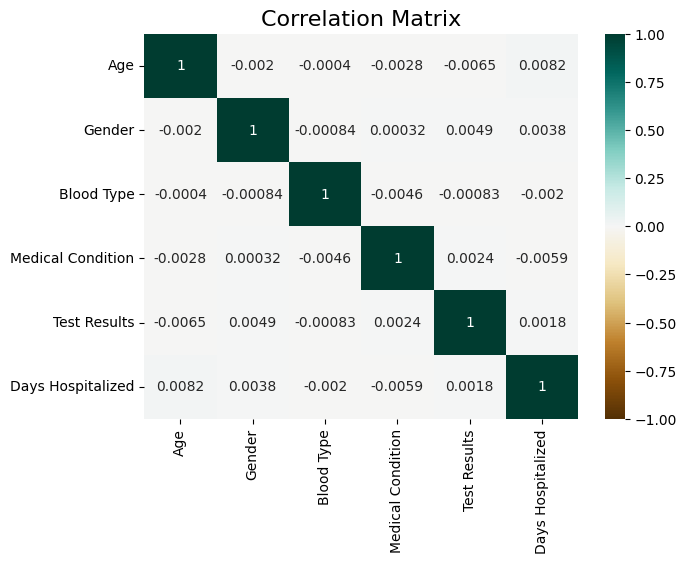

In [374]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Plot the correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
features = ['Age', 'Gender', 'Blood Type',	'Medical Condition']
X = df[features]
y = df['Test Results']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

In [ ]:
y_train

In [ ]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)